In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

Initial data processing:

(1) feature: default values 'yes' and 'no' changed to 1 and 0 respectively
(2) feature: housing values 'yes' and 'no' changed to 1 and 0 respectively
(3) feature: loan values 'yes' and 'no' changed to 1 and 0 respectively
(4) features: day and month changed to date in the year 2022 and later changed to feature called DateLastContacted which is number of days from the current day when the project was started.
(5) target variable 'y' values 'yes' and 'no' changed to 1 and 0 respectively

Categorical data for features "job", "marital", "education", "contact" to be handled later


In [3]:
df = pd.read_csv("../data/processed/data.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
df.corr(numeric_only=True)

,age,balance,duration,campaign,Default,Housing Loan,Personal Loan,DaysSinceLastContact,y
age,1.000000,0.081517,-0.036270,0.016204,-0.014857,-0.179606,0.000041,-0.092281,-0.020273
balance,0.081517,1.000000,0.014072,-0.008137,-0.070069,-0.049946,-0.080596,-0.099510,0.030232
duration,-0.036270,0.014072,1.000000,-0.088387,-0.008597,0.022455,-0.003952,0.024842,0.461169
campaign,0.016204,-0.008137,-0.088387,1.000000,0.012135,-0.054823,0.000582,-0.099118,-0.040350
Default,-0.014857,-0.070069,-0.008597,0.012135,1.000000,-0.019229,0.075006,-0.024561,-0.006559
Housing Loan,-0.179606,-0.049946,0.022455,-0.054823,-0.019229,1.000000,0.004266,0.165754,-0.054336
Personal Loan,0.000041,-0.080596,-0.003952,0.000582,0.075006,0.004266,1.000000,-0.044148,-0.031029
DaysSinceLastContact,-0.092281,-0.099510,0.024842,-0.099118,-0.024561,0.165754,-0.044148,1.000000,0.043391
y,-0.020273,0.030232,0.461169,-0.040350,-0.006559,-0.054336,-0.031029,0.043391,1.000000


From the above correlation matrix, we can see that the feature that has the maximum influence/correlation on/with the target variable is duration of the call with the customer.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'Default'}>,
        <Axes: title={'center': 'Housing Loan'}>],
       [<Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'DaysSinceLastContact'}>, <Axes: >]],
      dtype=object)

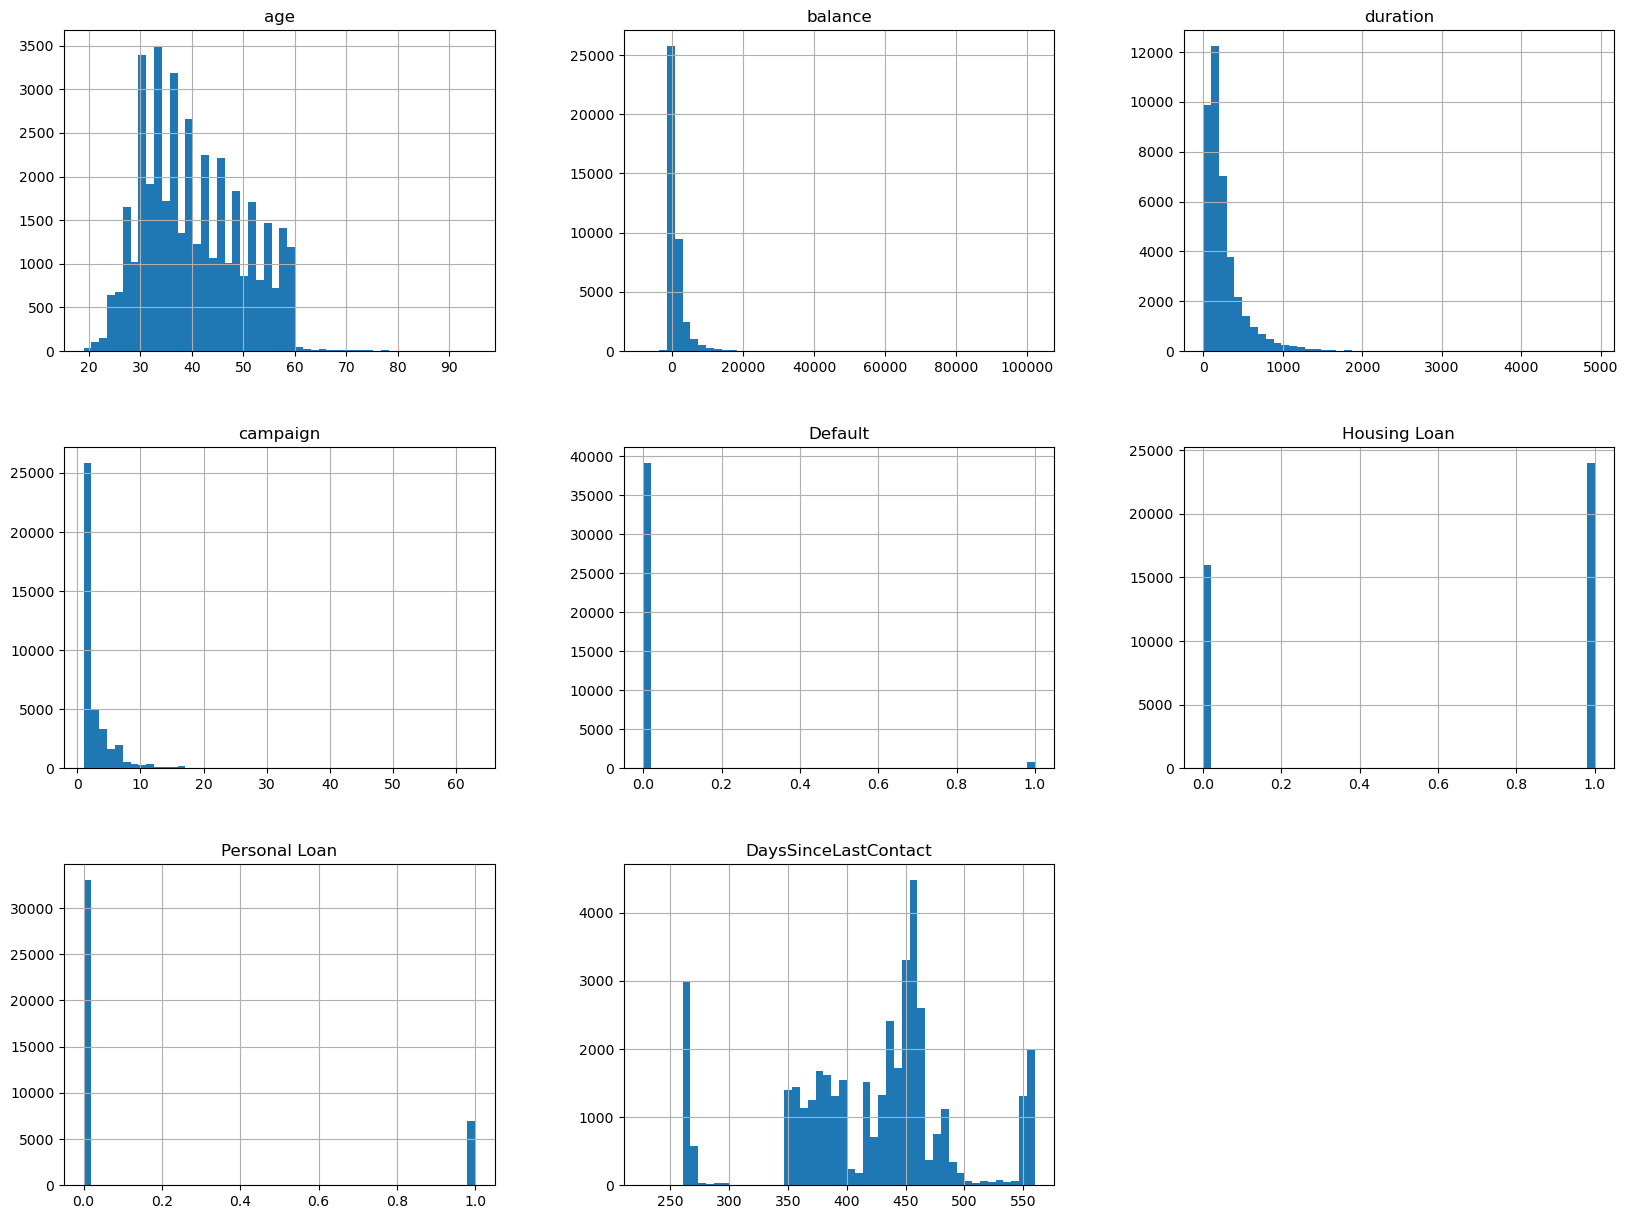

In [5]:
X.hist(bins=50, figsize=(20,15))

In [6]:
df2 = df.drop(columns = ['job', 'marital', 'education', 'contact'])
df2.agg(['skew']).T

,skew
age,0.436080
balance,8.259236
duration,3.165307
campaign,4.730901
Default,6.816736
Housing Loan,-0.411561
Personal Loan,1.726785
DaysSinceLastContact,-0.392312
y,3.300155


For skewness, a value between -0.5 to 0.5 is considered fairly symmetrical.  Things outside these bounds can be considered for scaling and transformation

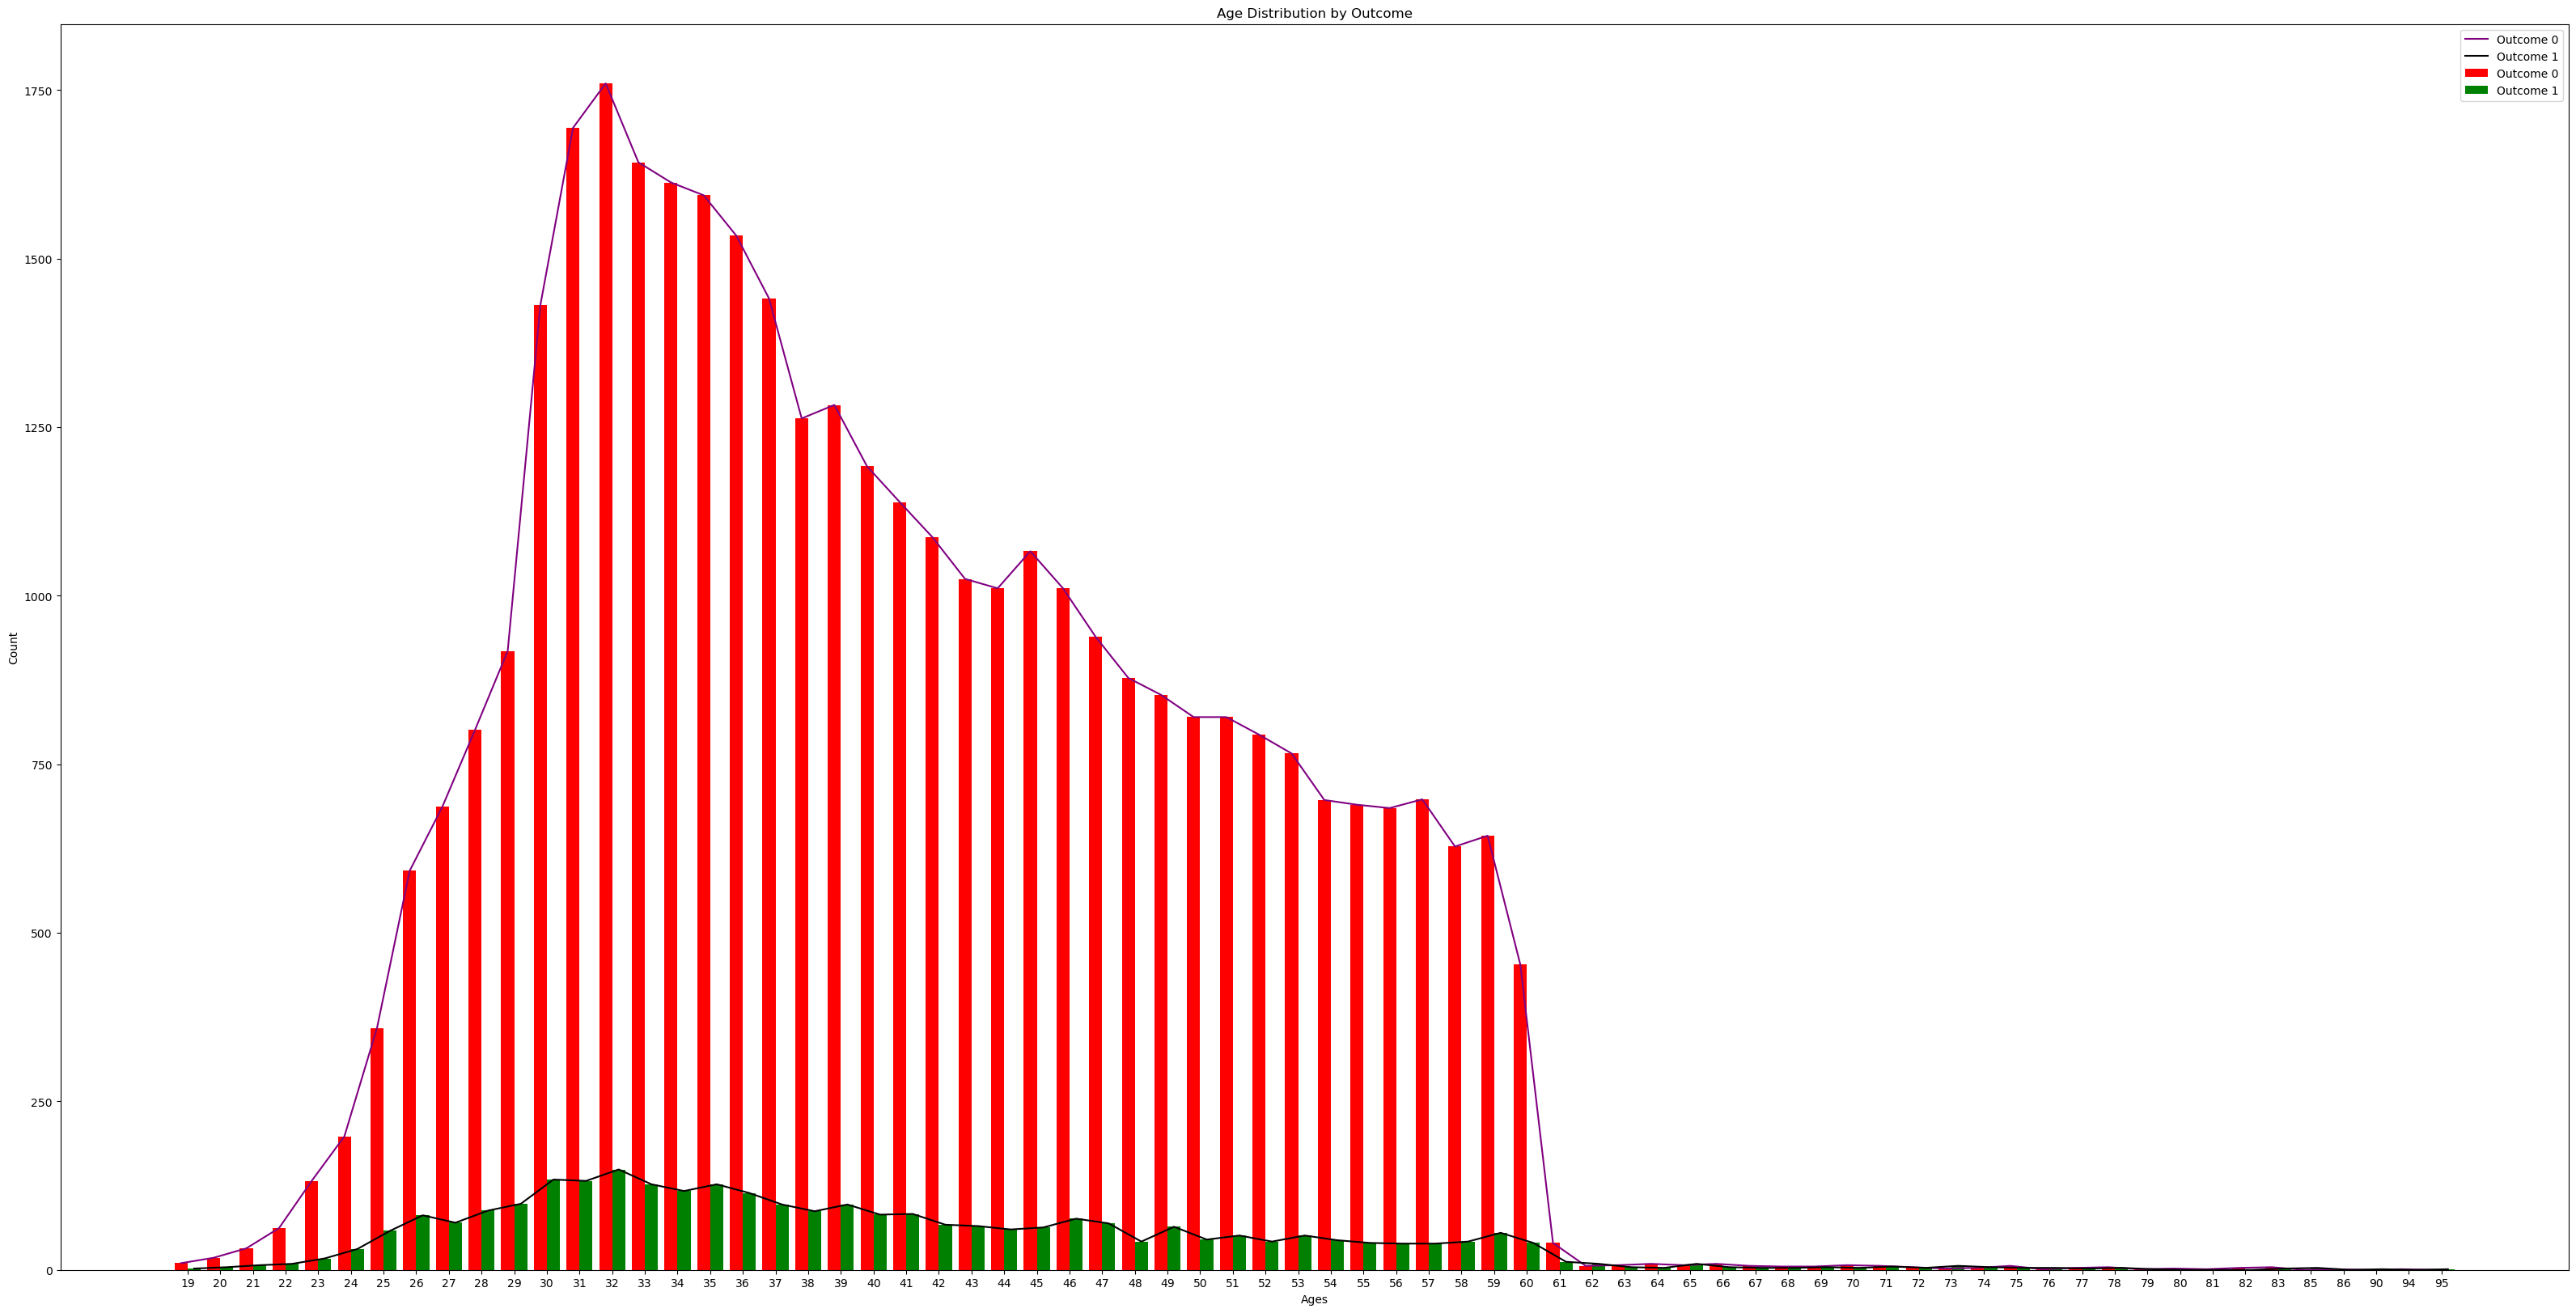

In [7]:
ages = X.iloc[:, 0]
outcomes = y

# Create a dictionary to store counts for each age and outcome
age_outcome_counts = {}
for age, outcome in zip(ages, outcomes):
    if age not in age_outcome_counts:
        age_outcome_counts[age] = [0, 0]  # Initialize counts for 0 and 1
    age_outcome_counts[age][outcome] += 1

# Extract data for plotting
age_labels = sorted(list(age_outcome_counts.keys()))
count_0 = [age_outcome_counts[age][0] for age in age_labels]
count_1 = [age_outcome_counts[age][1] for age in age_labels]

# Create a bar chart
plt.figure(figsize=(40, 20))
bar_width = 0.4
index = np.arange(len(age_labels))

plt.bar(index, count_0, width=bar_width, label='Outcome 0', color='red')
plt.bar(index + bar_width, count_1, width=bar_width, label='Outcome 1', color='green')

plt.plot(index, count_0, label='Outcome 0', color='purple')
plt.plot(index + bar_width, count_1, label='Outcome 1', color='k')

plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Age Distribution by Outcome')
plt.xticks(index + bar_width / 2, age_labels)
plt.legend()
plt.show()

It can be seen that the customers buying the product are sort of uniform across all age groups

dict_keys(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'])
dict_values([[7490, 676], [6355, 497], [1317, 88], [8848, 535], [218, 17], [1286, 151], [4132, 351], [3672, 238], [1302, 112], [1008, 96], [1034, 53], [442, 82]])
Management Ratio:  0.09025367156208278
Technician Ratio:  0.07820613690007867
Entrepreneur Ratio:  0.06681852695520121
Blue_collar Ratio:  0.06046564195298373
Uknown Ratio:  0.0779816513761468
Retired:  0.11741835147744946
Admin Ratio:  0.08494675701839303
Services Ratio:  0.06481481481481481
Self_employed Ratio:  0.08602150537634409
Unemployed Ratio:  0.09523809523809523
Housemaid Ratio:  0.05125725338491296
Student Ratio:  0.18552036199095023


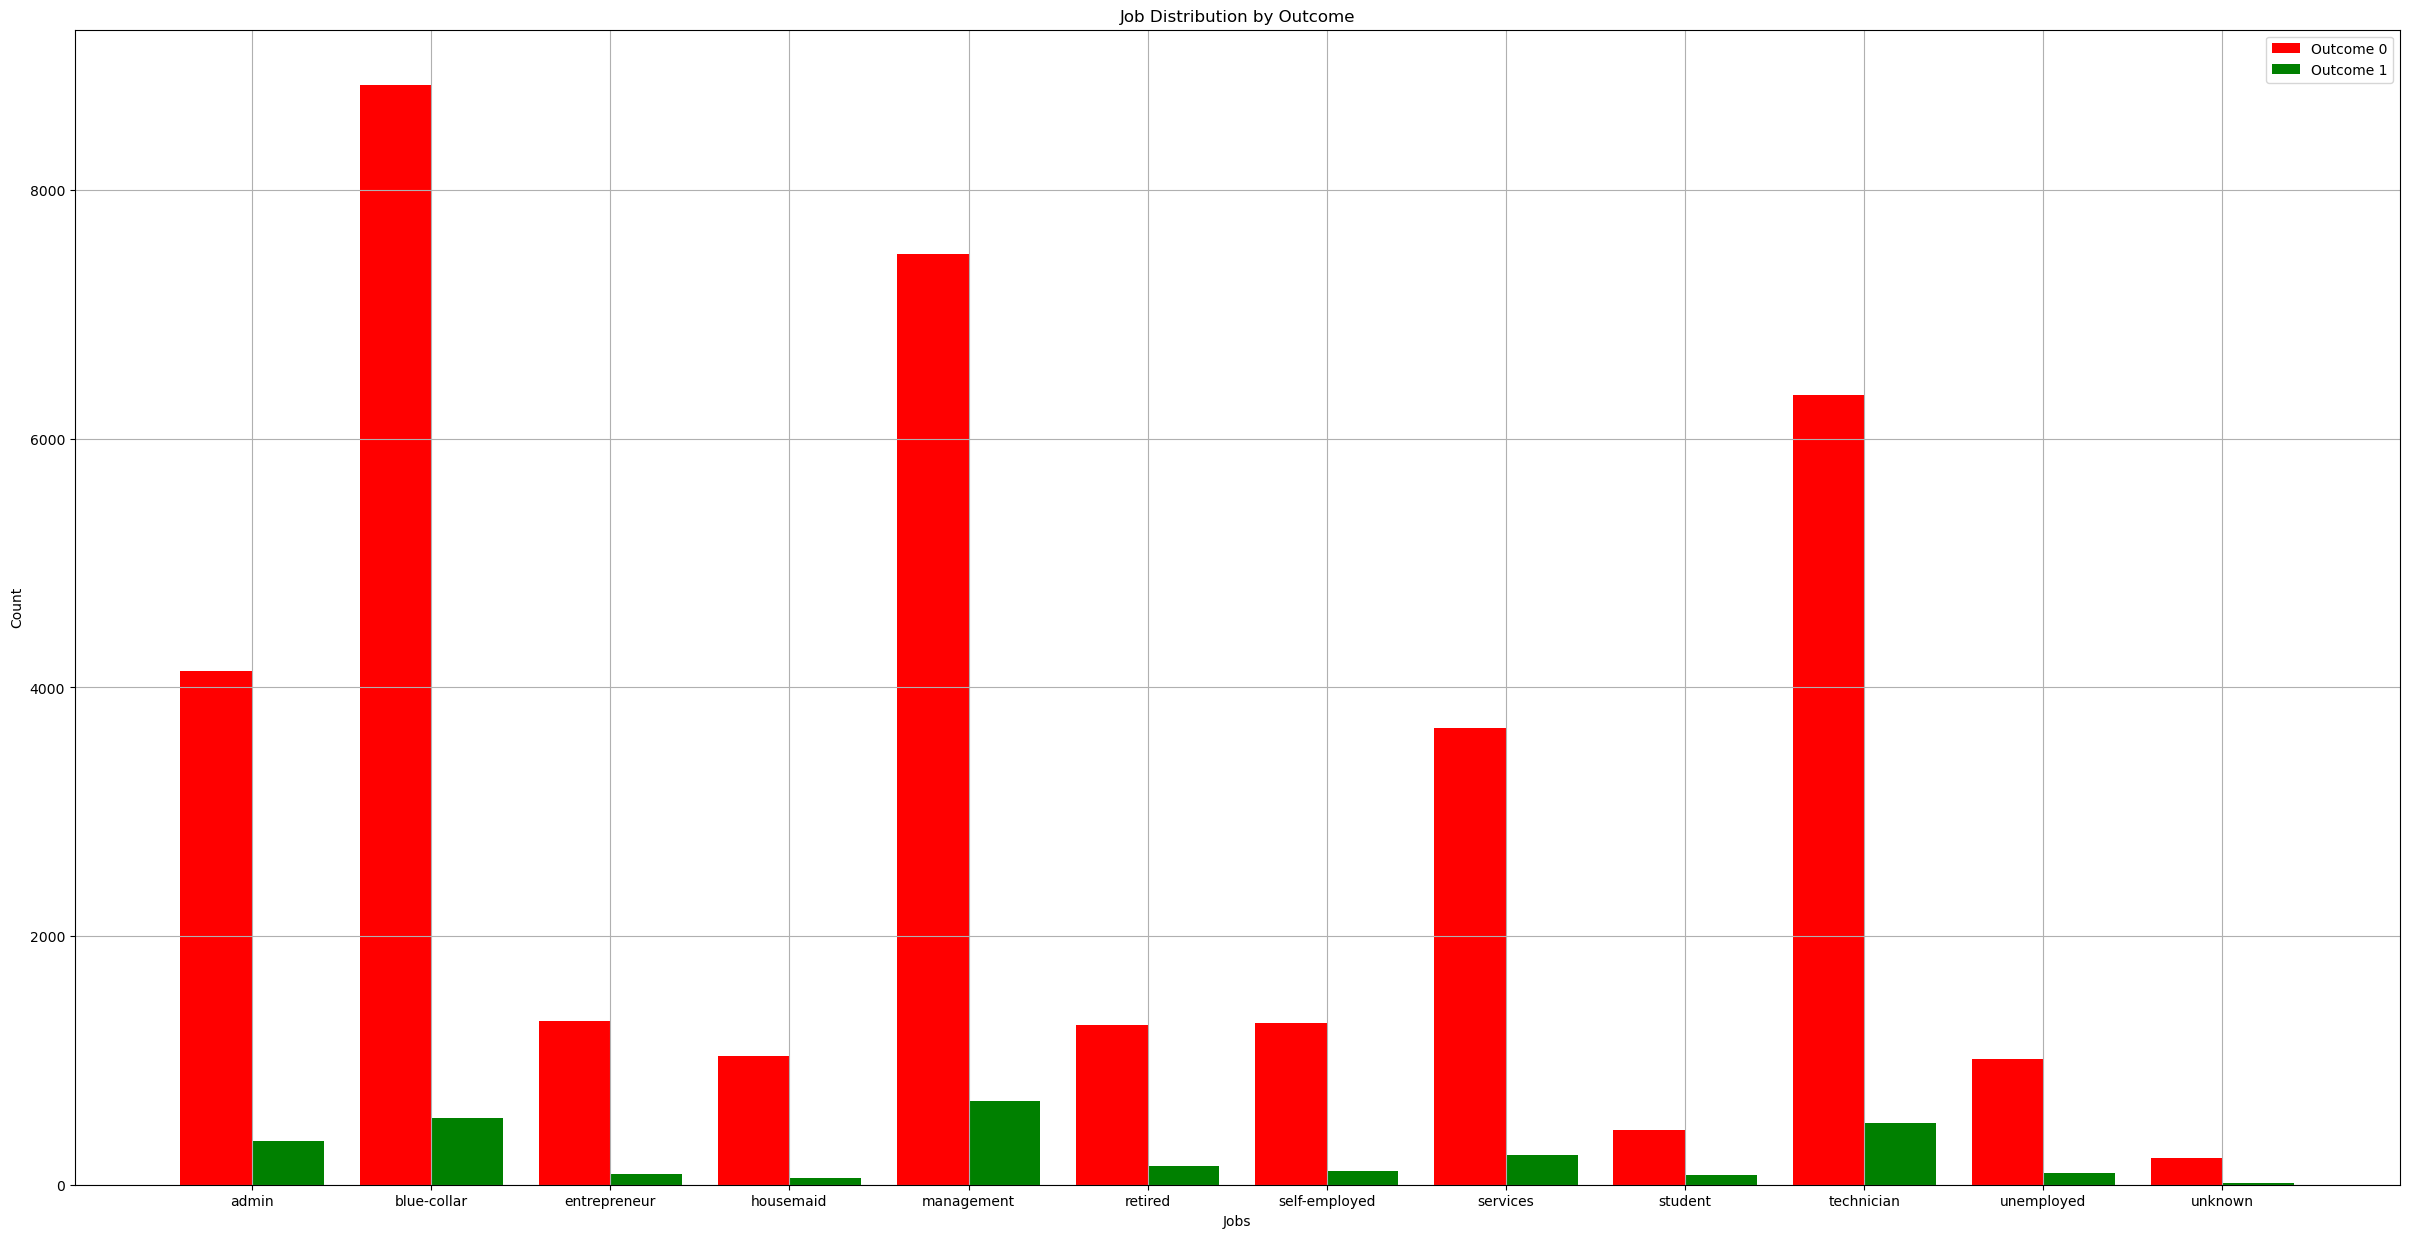

In [8]:
jobs = X.iloc[:, 1]
outcomes = y

# Create a dictionary to store counts for each age and outcome
job_outcome_counts = {}
for job, outcome in zip(jobs, outcomes):
    if job not in job_outcome_counts:
        job_outcome_counts[job] = [0, 0]  # Initialize counts for 0 and 1
    job_outcome_counts[job][outcome] += 1

# Extract data for plotting
job_labels = sorted(list(job_outcome_counts.keys()))
count_0 = [job_outcome_counts[job][0] for job in job_labels]
count_1 = [job_outcome_counts[job][1] for job in job_labels]

print(job_outcome_counts.keys())
print(job_outcome_counts.values())
yes_no_list = list(job_outcome_counts.values())
mg_ratio = yes_no_list[0][1]/ yes_no_list[0][0]
print("Management Ratio: " , mg_ratio)
tech_ratio = yes_no_list[1][1]/ yes_no_list[1][0]
print("Technician Ratio: " , tech_ratio)
ent_ratio = yes_no_list[2][1]/ yes_no_list[2][0]
print("Entrepreneur Ratio: " , ent_ratio)
blu_ratio = yes_no_list[3][1]/ yes_no_list[3][0]
print("Blue_collar Ratio: " , blu_ratio)
unk_ratio = yes_no_list[4][1]/ yes_no_list[4][0]
print("Uknown Ratio: " , unk_ratio)
ret_ratio = yes_no_list[5][1]/ yes_no_list[5][0]
print("Retired: " , ret_ratio)
adm_ratio = yes_no_list[6][1]/ yes_no_list[6][0]
print("Admin Ratio: " , adm_ratio)
ser_ratio = yes_no_list[7][1]/ yes_no_list[7][0]
print("Services Ratio: " , ser_ratio)
selfEmp_ratio = yes_no_list[8][1]/ yes_no_list[8][0]
print("Self_employed Ratio: " , selfEmp_ratio)
unemp_ratio = yes_no_list[9][1]/ yes_no_list[9][0]
print("Unemployed Ratio: " , unemp_ratio)
hmaid_ratio = yes_no_list[10][1]/ yes_no_list[10][0]
print("Housemaid Ratio: " , hmaid_ratio)
std_ratio = yes_no_list[11][1]/ yes_no_list[11][0]
print("Student Ratio: " , std_ratio)

# Create a bar chart
plt.figure(figsize=(30, 15))
bar_width = 0.4
index = np.arange(len(job_labels))

plt.bar(index, count_0, width=bar_width, label='Outcome 0', color='red')
plt.bar(index + bar_width, count_1, width=bar_width, label='Outcome 1', color='green')

plt.xlabel('Jobs')
plt.ylabel('Count')
plt.title('Job Distribution by Outcome')
plt.xticks(index + bar_width / 2, job_labels)
plt.legend()
plt.grid(True)
plt.show()

It can be seen that the product is more popular among students followed by retired customers

dict_keys(['married', 'single', 'divorced'])
dict_values([[22908, 1478], [9862, 1027], [4334, 391]])
Married Ratio:  0.06451894534660381
Single Ratio:  0.1041370918677753
Divorced Ratio:  0.0902168897092755


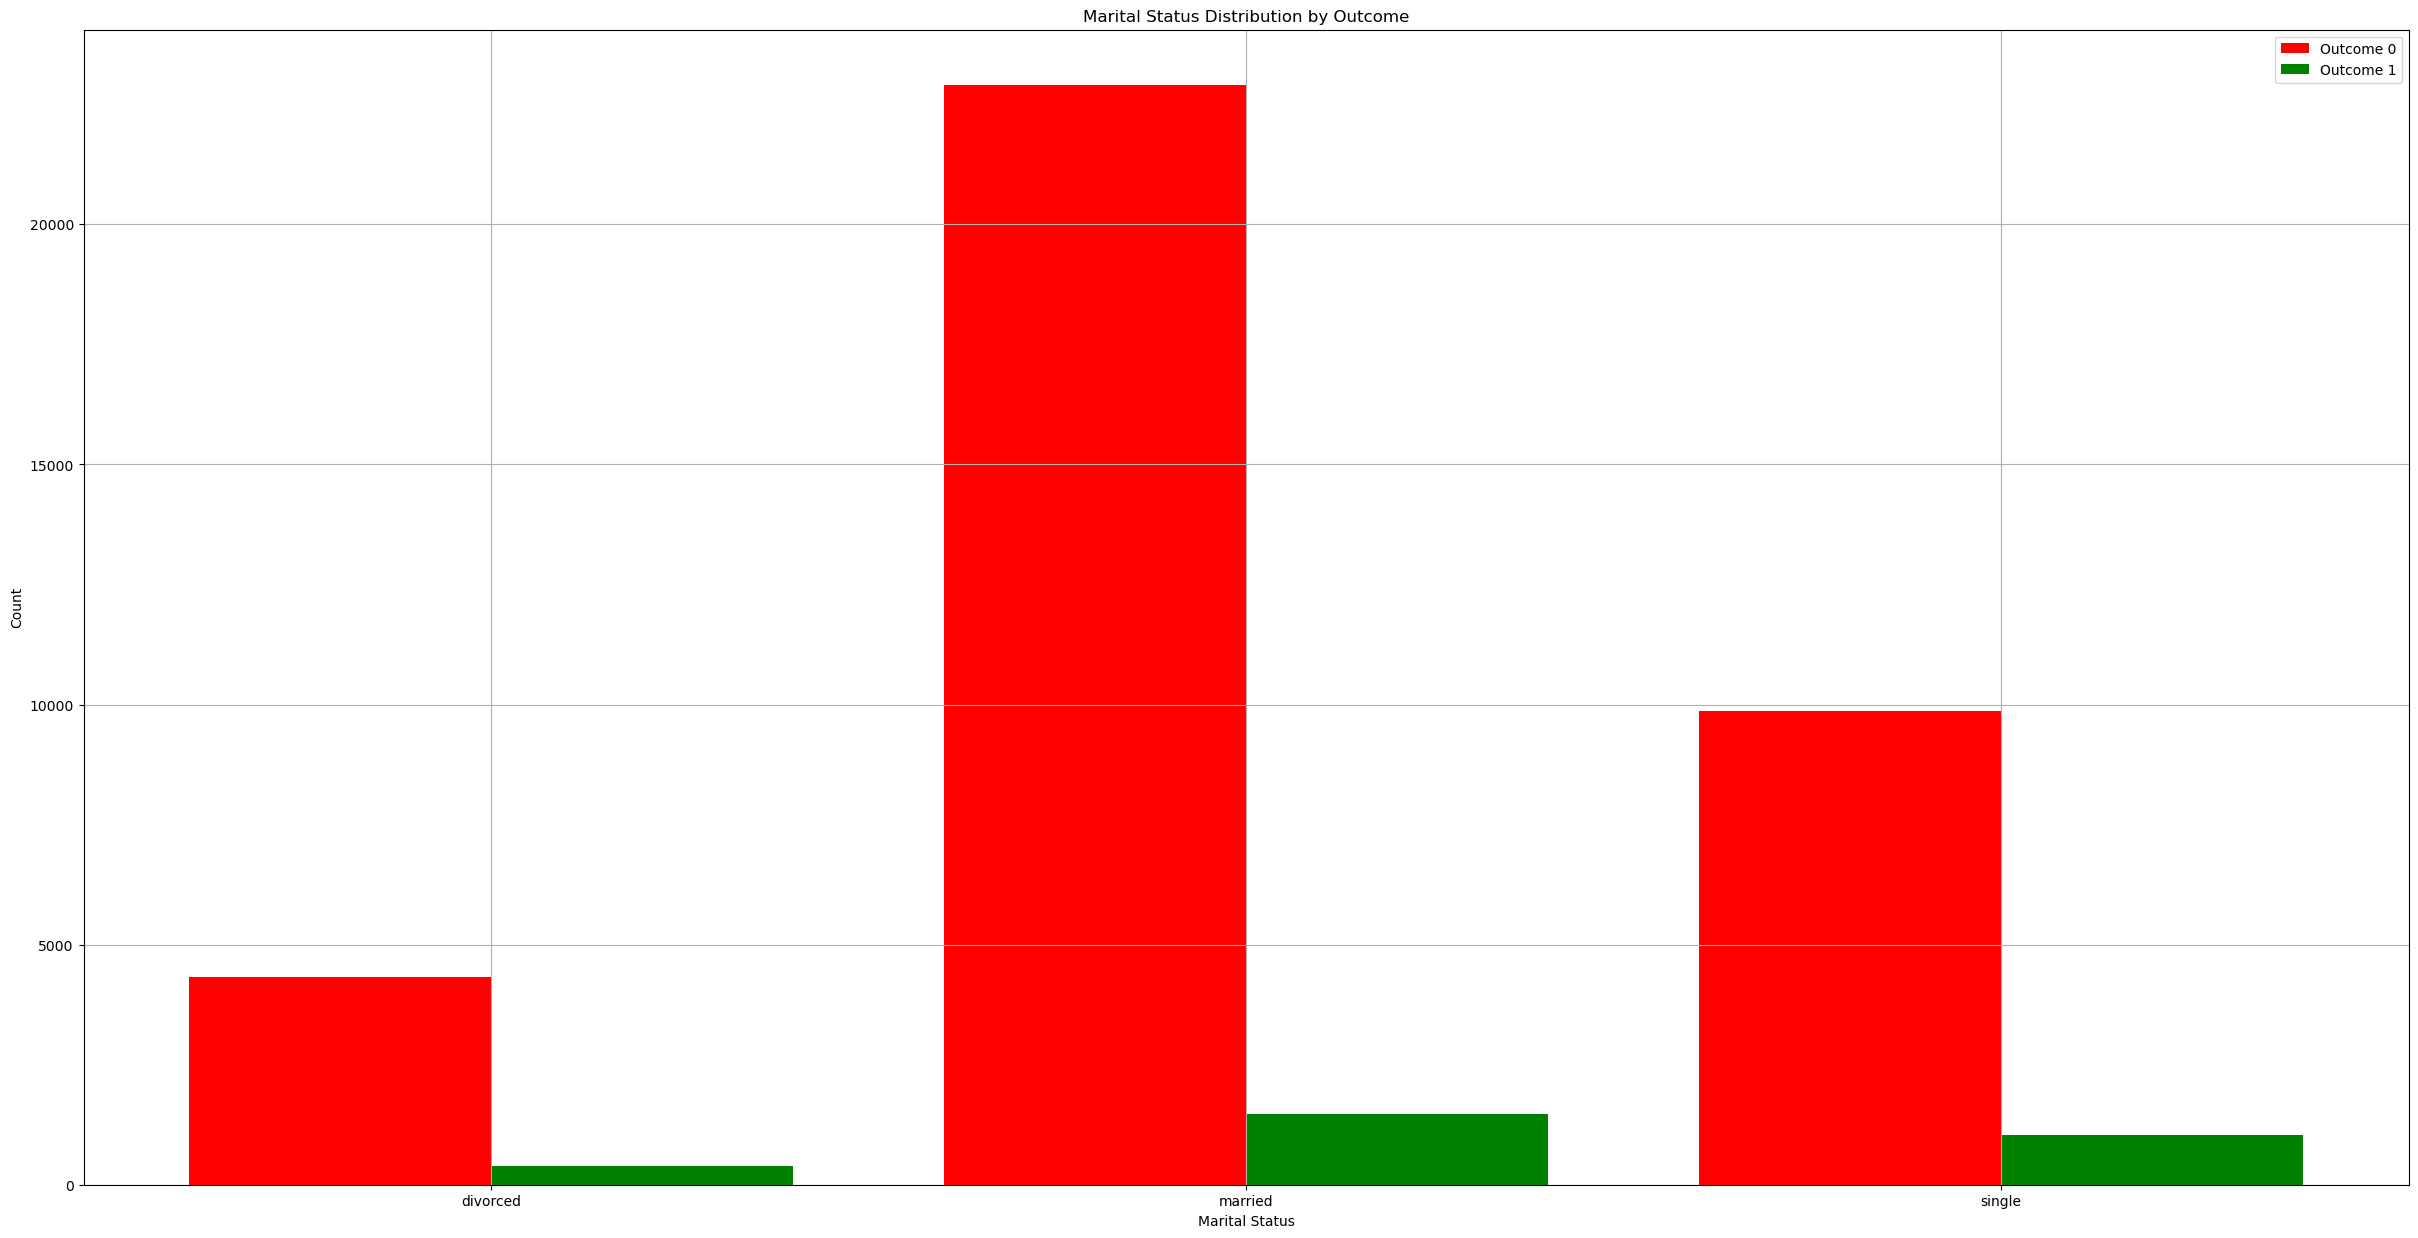

In [9]:
marital_statuses = X.iloc[:, 2]
outcomes = y

# Create a dictionary to store counts for each age and outcome
marital_status_outcome_counts = {}
for marital_status, outcome in zip(marital_statuses, outcomes):
    if marital_status not in marital_status_outcome_counts:
        marital_status_outcome_counts[marital_status] = [0, 0]  # Initialize counts for 0 and 1
    marital_status_outcome_counts[marital_status][outcome] += 1
    
# Extract data for plotting
marital_status_labels = sorted(list(marital_status_outcome_counts.keys()))
count_0 = [marital_status_outcome_counts[marital_status][0] for marital_status in marital_status_labels]
count_1 = [marital_status_outcome_counts[marital_status][1] for marital_status in marital_status_labels]

print(marital_status_outcome_counts.keys())
print(marital_status_outcome_counts.values())
yes_no_list = list(marital_status_outcome_counts.values())
m_ratio = yes_no_list[0][1]/ yes_no_list[0][0]
print("Married Ratio: " , m_ratio)
s_ratio = yes_no_list[1][1]/ yes_no_list[1][0]
print("Single Ratio: " , s_ratio)
d_ratio = yes_no_list[2][1]/ yes_no_list[2][0]
print("Divorced Ratio: " , d_ratio)

# Create a bar chart
plt.figure(figsize=(30, 15))
bar_width = 0.4
index = np.arange(len(marital_status_labels))

plt.bar(index, count_0, width=bar_width, label='Outcome 0', color='red')
plt.bar(index + bar_width, count_1, width=bar_width, label='Outcome 1', color='green')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Outcome')
plt.xticks(index + bar_width / 2, marital_status_labels)
plt.legend()
plt.grid(True)
plt.show()

It can be seen that, the product is more popular among Single and Divorced than Married customers

dict_keys(['tertiary', 'secondary', 'unknown', 'primary'])
dict_values([[10177, 1029], [19575, 1418], [1435, 96], [5917, 353]])
Tertiary Ratio:  0.10111034686056795
Secondary Ratio:  0.07243933588761176
Uknown Ratio:  0.06689895470383275
Primary Ratio:  0.05965861078249113


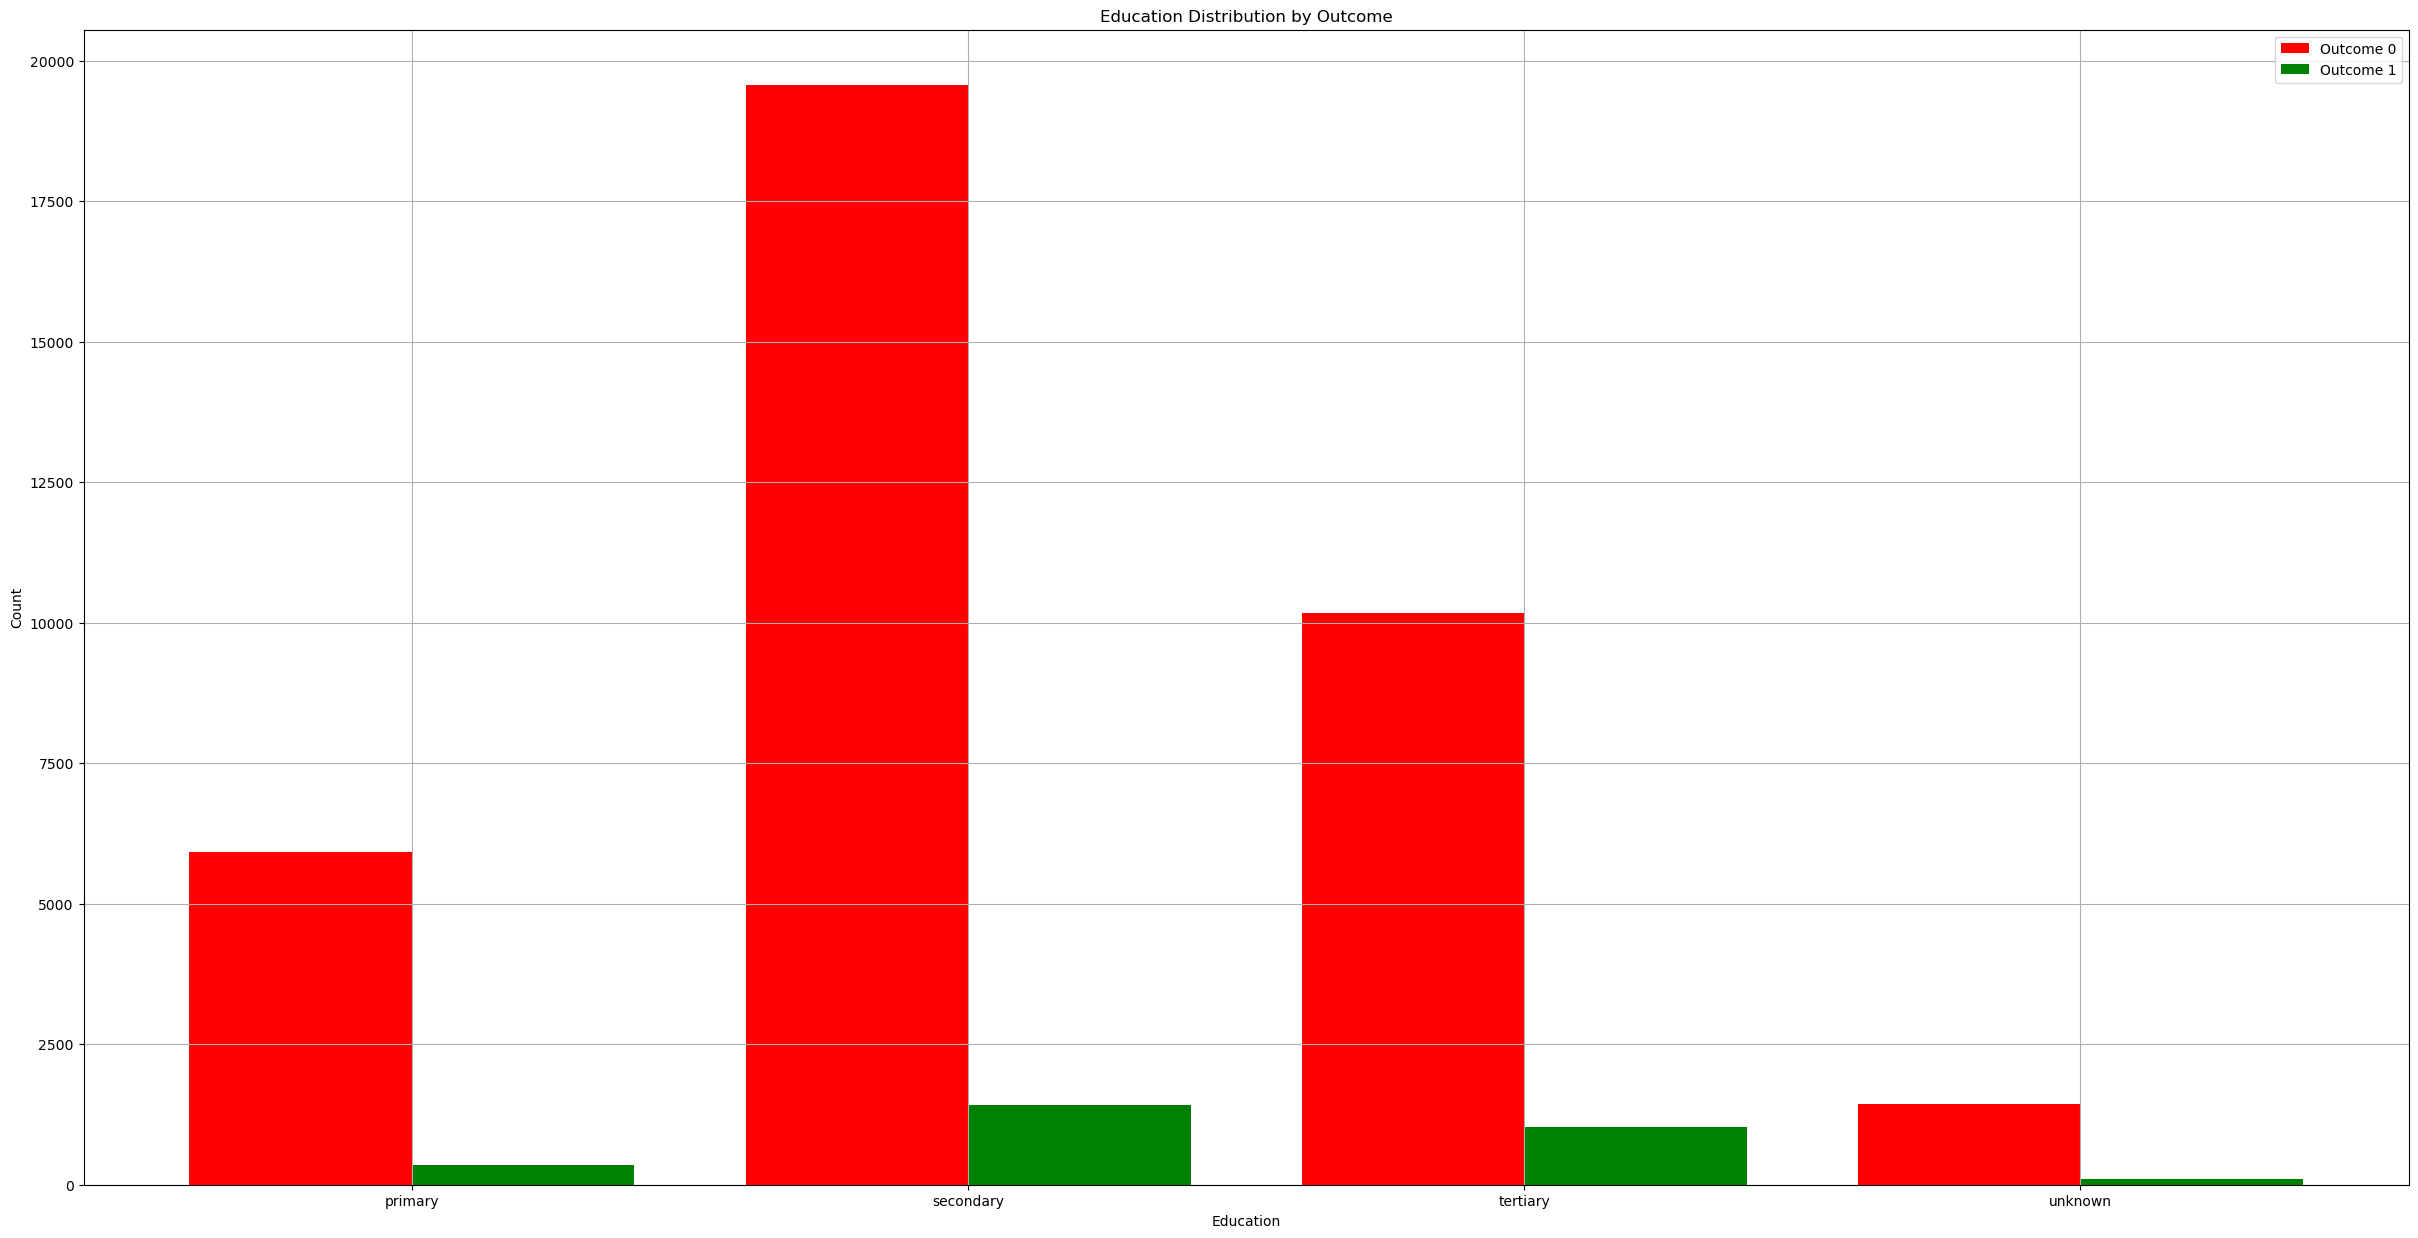

In [10]:
educations = X.iloc[:, 3]
outcomes = y

# Create a dictionary to store counts for each age and outcome
education_outcome_counts = {}
for education, outcome in zip(educations, outcomes):
    if education not in education_outcome_counts:
        education_outcome_counts[education] = [0, 0]  # Initialize counts for 0 and 1
    education_outcome_counts[education][outcome] += 1
    
# Extract data for plotting
education_labels = sorted(list(education_outcome_counts.keys()))
count_0 = [education_outcome_counts[education][0] for education in education_labels]
count_1 = [education_outcome_counts[education][1] for education in education_labels]

print(education_outcome_counts.keys())
print(education_outcome_counts.values())
yes_no_list = list(education_outcome_counts.values())
t_ratio = yes_no_list[0][1]/ yes_no_list[0][0]
print("Tertiary Ratio: " , t_ratio)
s_ratio = yes_no_list[1][1]/ yes_no_list[1][0]
print("Secondary Ratio: " , s_ratio)
u_ratio = yes_no_list[2][1]/ yes_no_list[2][0]
print("Uknown Ratio: " , u_ratio)
p_ratio = yes_no_list[3][1]/ yes_no_list[3][0]
print("Primary Ratio: " , p_ratio)

# Create a bar chart
plt.figure(figsize=(30, 15))
bar_width = 0.4
index = np.arange(len(education_labels))

plt.bar(index, count_0, width=bar_width, label='Outcome 0', color='red')
plt.bar(index + bar_width, count_1, width=bar_width, label='Outcome 1', color='green')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution by Outcome')
plt.xticks(index + bar_width / 2, education_labels)
plt.legend()
plt.grid(True)
plt.show()

It can be seen that the product is more popular among tertiary educated customers followed by the secondary educated customers

dict_keys([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000])
dict_values([[36495, 2834], [464, 50], [108, 8], [16, 3], [9, 1], [7, 0], [3, 0], [0, 0], [0, 0], [1, 0], [1, 0], [0, 0]])
less than ten thousand Ratio:  0.07765447321550897
Less than 20 thousand Ratio:  0.10775862068965517
Less than 30 thousand Ratio:  0.07407407407407407
Less than 40 thousand Ratio:  0.1875
Less than 50 thousand Ratio:  0.1111111111111111


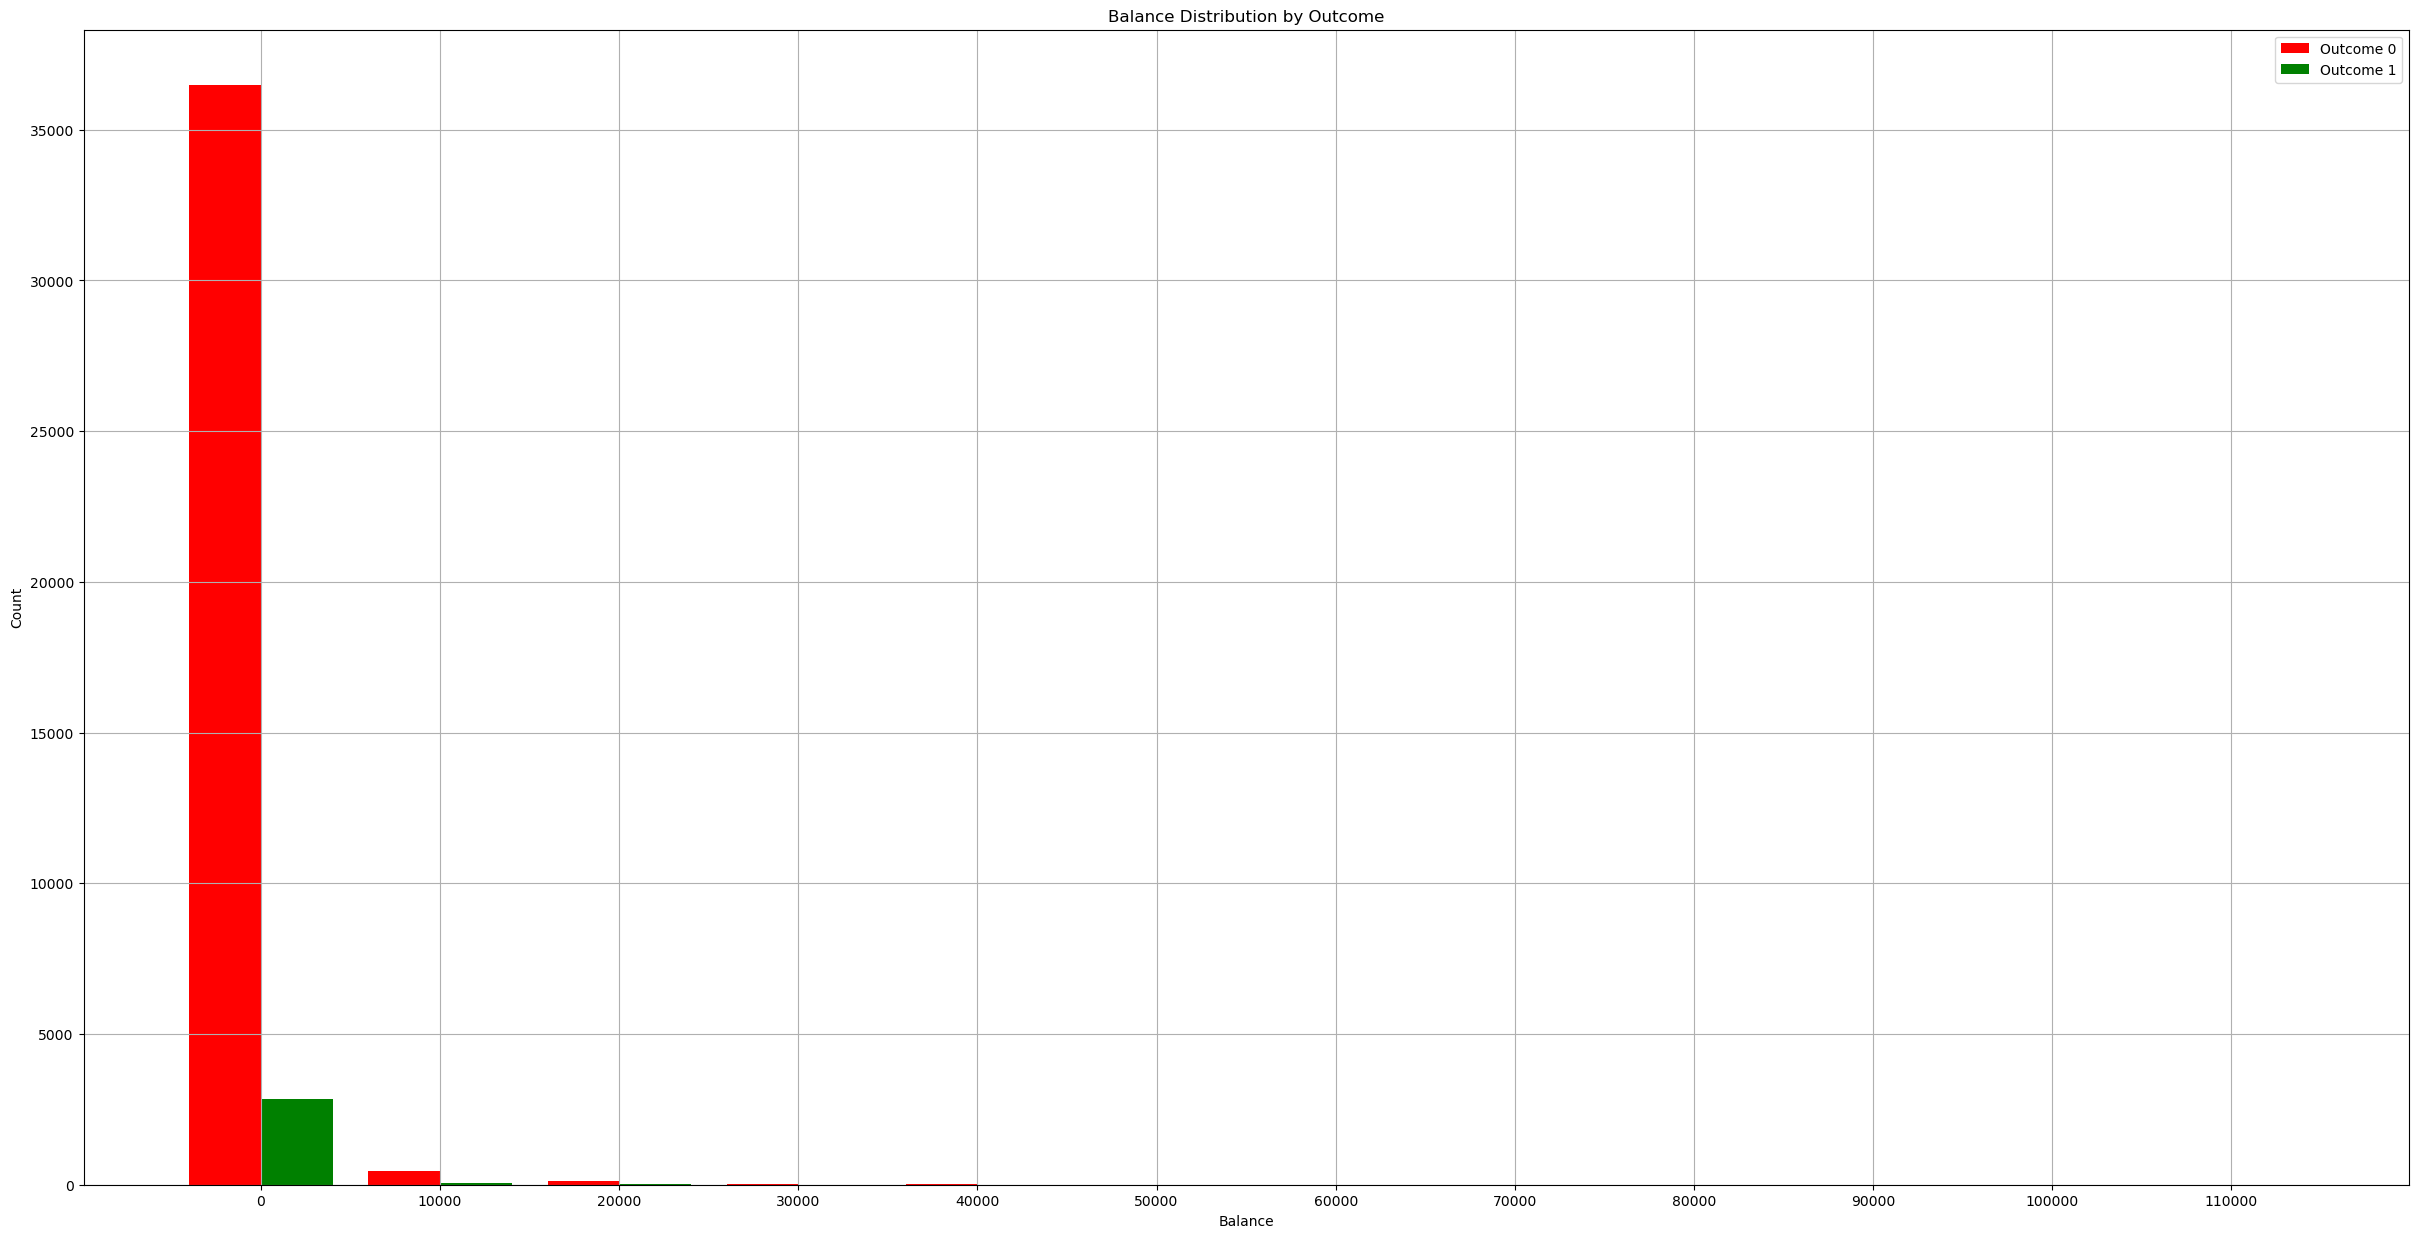

In [11]:
balances = X.iloc[:, 4]
outcomes = y

band = 10000

b_o_counts = {}
for i in range(0, max(balances) + 10000, band):
    b_o_counts[i] = [0, 0]

for b, o in zip(balances, outcomes):
    if b < band :
        if o == 0:
            b_o_counts[0][0] += 1
        elif o == 1:
            b_o_counts[0][1] += 1
    elif b < (band * 2):
        if o == 0:
            b_o_counts[band][0] += 1
        elif o == 1:
            b_o_counts[band][1] += 1
    elif b < (band * 3):
        if o == 0:
            b_o_counts[band * 2][0] += 1
        elif o == 1:
            b_o_counts[band * 2][1] += 1
    elif b < (band * 4):
        if o == 0:
            b_o_counts[band * 3][0] += 1
        elif o == 1:
            b_o_counts[band * 3][1] += 1
    elif b < (band * 5):
        if o == 0:
            b_o_counts[band * 4][0] += 1
        elif o == 1:
            b_o_counts[band * 4][1] += 1
    elif b < (band * 6):
        if o == 0:
            b_o_counts[band * 5][0] += 1
        elif o == 1:
            b_o_counts[band * 5][1] += 1
    elif b < (band * 7):
        if o == 0:
            b_o_counts[band * 6][0] += 1
        elif o == 1:
            b_o_counts[band * 6][1] += 1
    elif b < (band * 8):
        if o == 0:
            b_o_counts[band * 7][0] += 1
        elif o == 1:
            b_o_counts[band * 7][1] += 1
    elif b < (band * 9):
        if o == 0:
            b_o_counts[band * 8][0] += 1
        elif o == 1:
            b_o_counts[band * 8][1] += 1
    elif b < (band * 10):
        if o == 0:
            b_o_counts[band * 9][0] += 1
        elif o == 1:
            b_o_counts[band * 9][1] += 1
    elif b < (band * 11):
        if o == 0:
            b_o_counts[band * 10][0] += 1
        elif o == 1:
            b_o_counts[band * 10][1] += 1
    elif b < (band * 12):
        if o == 0:
            b_o_counts[band * 11][0] += 1
        elif o == 1:
            b_o_counts[band * 11][1] += 1

# Extract data for plotting
balance_labels = sorted(list(b_o_counts.keys()))
count_0 = [b_o_counts[balance][0] for balance in balance_labels]
count_1 = [b_o_counts[balance][1] for balance in balance_labels]

print(b_o_counts.keys())
print(b_o_counts.values())
yes_no_list = list(b_o_counts.values())
lt_10_ratio = yes_no_list[0][1]/ yes_no_list[0][0]
print("less than ten thousand Ratio: " , lt_10_ratio)
lt_20_ratio = yes_no_list[1][1]/ yes_no_list[1][0]
print("Less than 20 thousand Ratio: " , lt_20_ratio)
lt_30_ratio = yes_no_list[2][1]/ yes_no_list[2][0]
print("Less than 30 thousand Ratio: " , lt_30_ratio)
lt_40_ratio = yes_no_list[3][1]/ yes_no_list[3][0]
print("Less than 40 thousand Ratio: " , lt_40_ratio)
lt_50_ratio = yes_no_list[4][1]/ yes_no_list[4][0]
print("Less than 50 thousand Ratio: " , lt_50_ratio)

# Create a bar chart
plt.figure(figsize=(30, 15))
bar_width = 0.4
index = np.arange(len(balance_labels))

plt.bar(index, count_0, width=bar_width, label='Outcome 0', color='red')
plt.bar(index + bar_width, count_1, width=bar_width, label='Outcome 1', color='green')

plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance Distribution by Outcome')
plt.xticks(index + bar_width / 2, balance_labels)
plt.legend()
plt.grid(True)
plt.show()

From the above analysis, we can see that, there are very few samples for balance greater than 50,000 and there is no positive outcome in those.  The product seems to be popular among balances less than 20,000 and 40 to 50 thousand.  Interesting thing to note is even negative balances have positive outcomes for the product.

dict_keys(['unknown', 'cellular', 'telephone'])
dict_values([[12268, 497], [22681, 2233], [2155, 166]])
Unknown Ratio:  0.0405119008803391
Cellular Ratio:  0.0984524491865438
Telephone Ratio:  0.07703016241299304


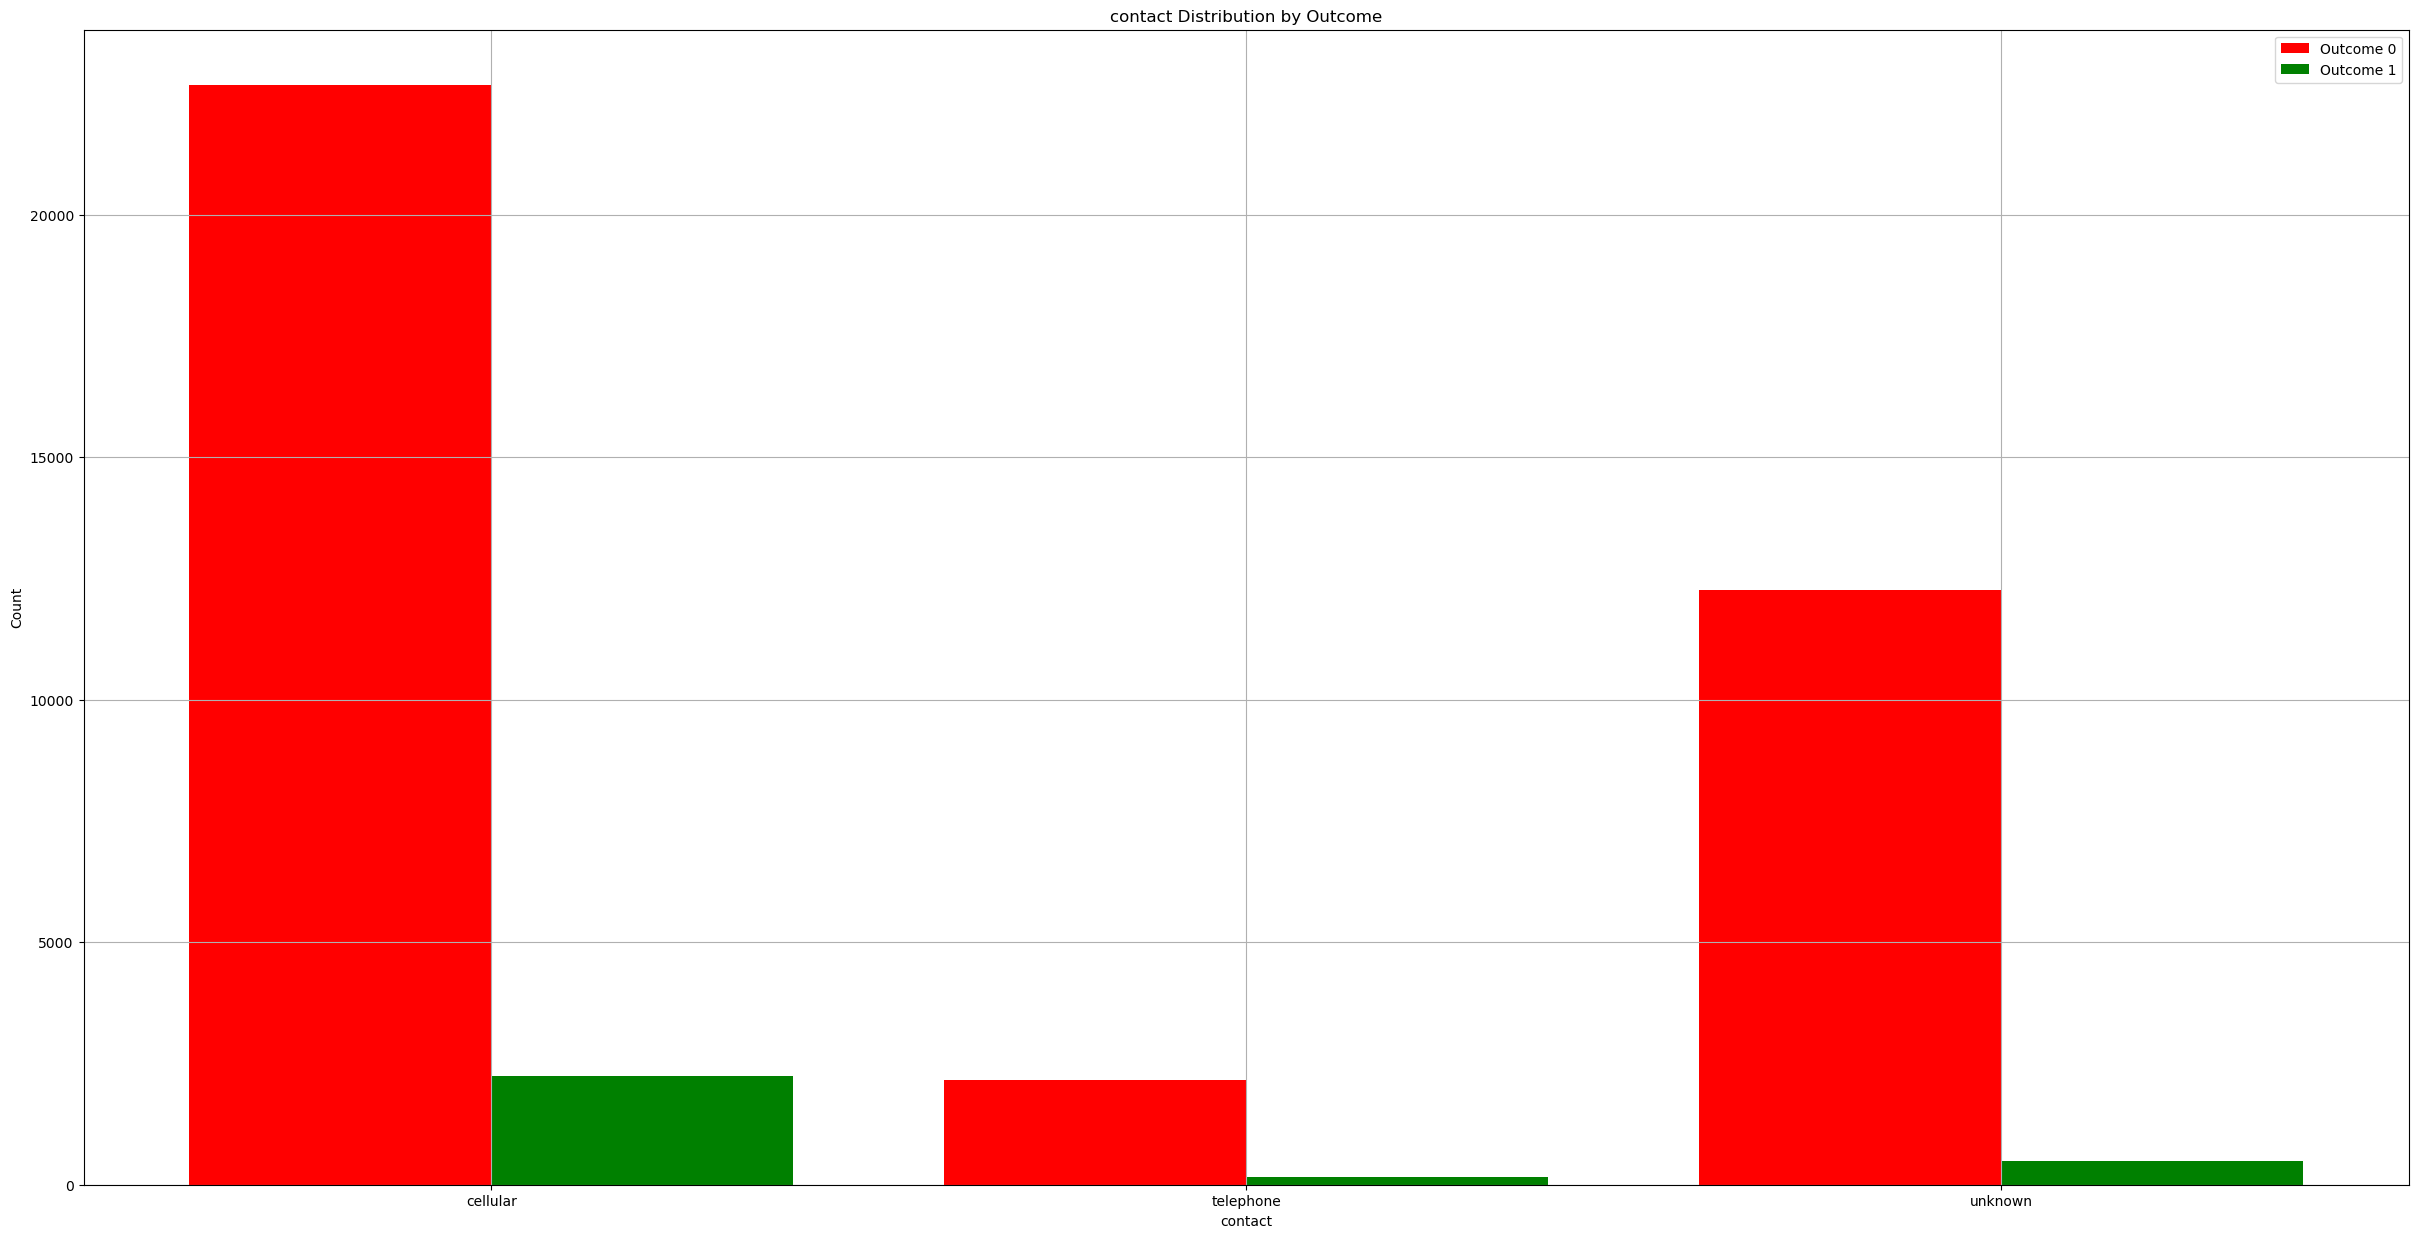

In [12]:
contacts = X.iloc[:, 5]
outcomes = y

# Create a dictionary to store counts for each age and outcome
contact_outcome_counts = {}
for contact, outcome in zip(contacts, outcomes):
    if contact not in contact_outcome_counts:
        contact_outcome_counts[contact] = [0, 0]  # Initialize counts for 0 and 1
    contact_outcome_counts[contact][outcome] += 1
    
# Extract data for plotting
contact_labels = sorted(list(contact_outcome_counts.keys()))
count_0 = [contact_outcome_counts[contact][0] for contact in contact_labels]
count_1 = [contact_outcome_counts[contact][1] for contact in contact_labels]

print(contact_outcome_counts.keys())
print(contact_outcome_counts.values())
yes_no_list = list(contact_outcome_counts.values())
u_ratio = yes_no_list[0][1]/ yes_no_list[0][0]
print("Unknown Ratio: " , u_ratio)
c_ratio = yes_no_list[1][1]/ yes_no_list[1][0]
print("Cellular Ratio: " , c_ratio)
t_ratio = yes_no_list[2][1]/ yes_no_list[2][0]
print("Telephone Ratio: " , t_ratio)

# Create a bar chart
plt.figure(figsize=(30, 15))
bar_width = 0.4
index = np.arange(len(contact_labels))

plt.bar(index, count_0, width=bar_width, label='Outcome 0', color='red')
plt.bar(index + bar_width, count_1, width=bar_width, label='Outcome 1', color='green')

plt.xlabel('contact')
plt.ylabel('Count')
plt.title('contact Distribution by Outcome')
plt.xticks(index + bar_width / 2, contact_labels)
plt.legend()
plt.grid(True)
plt.show()

Contact via cellphone seems to be more effective followed by telephone with Unkown being the least effective

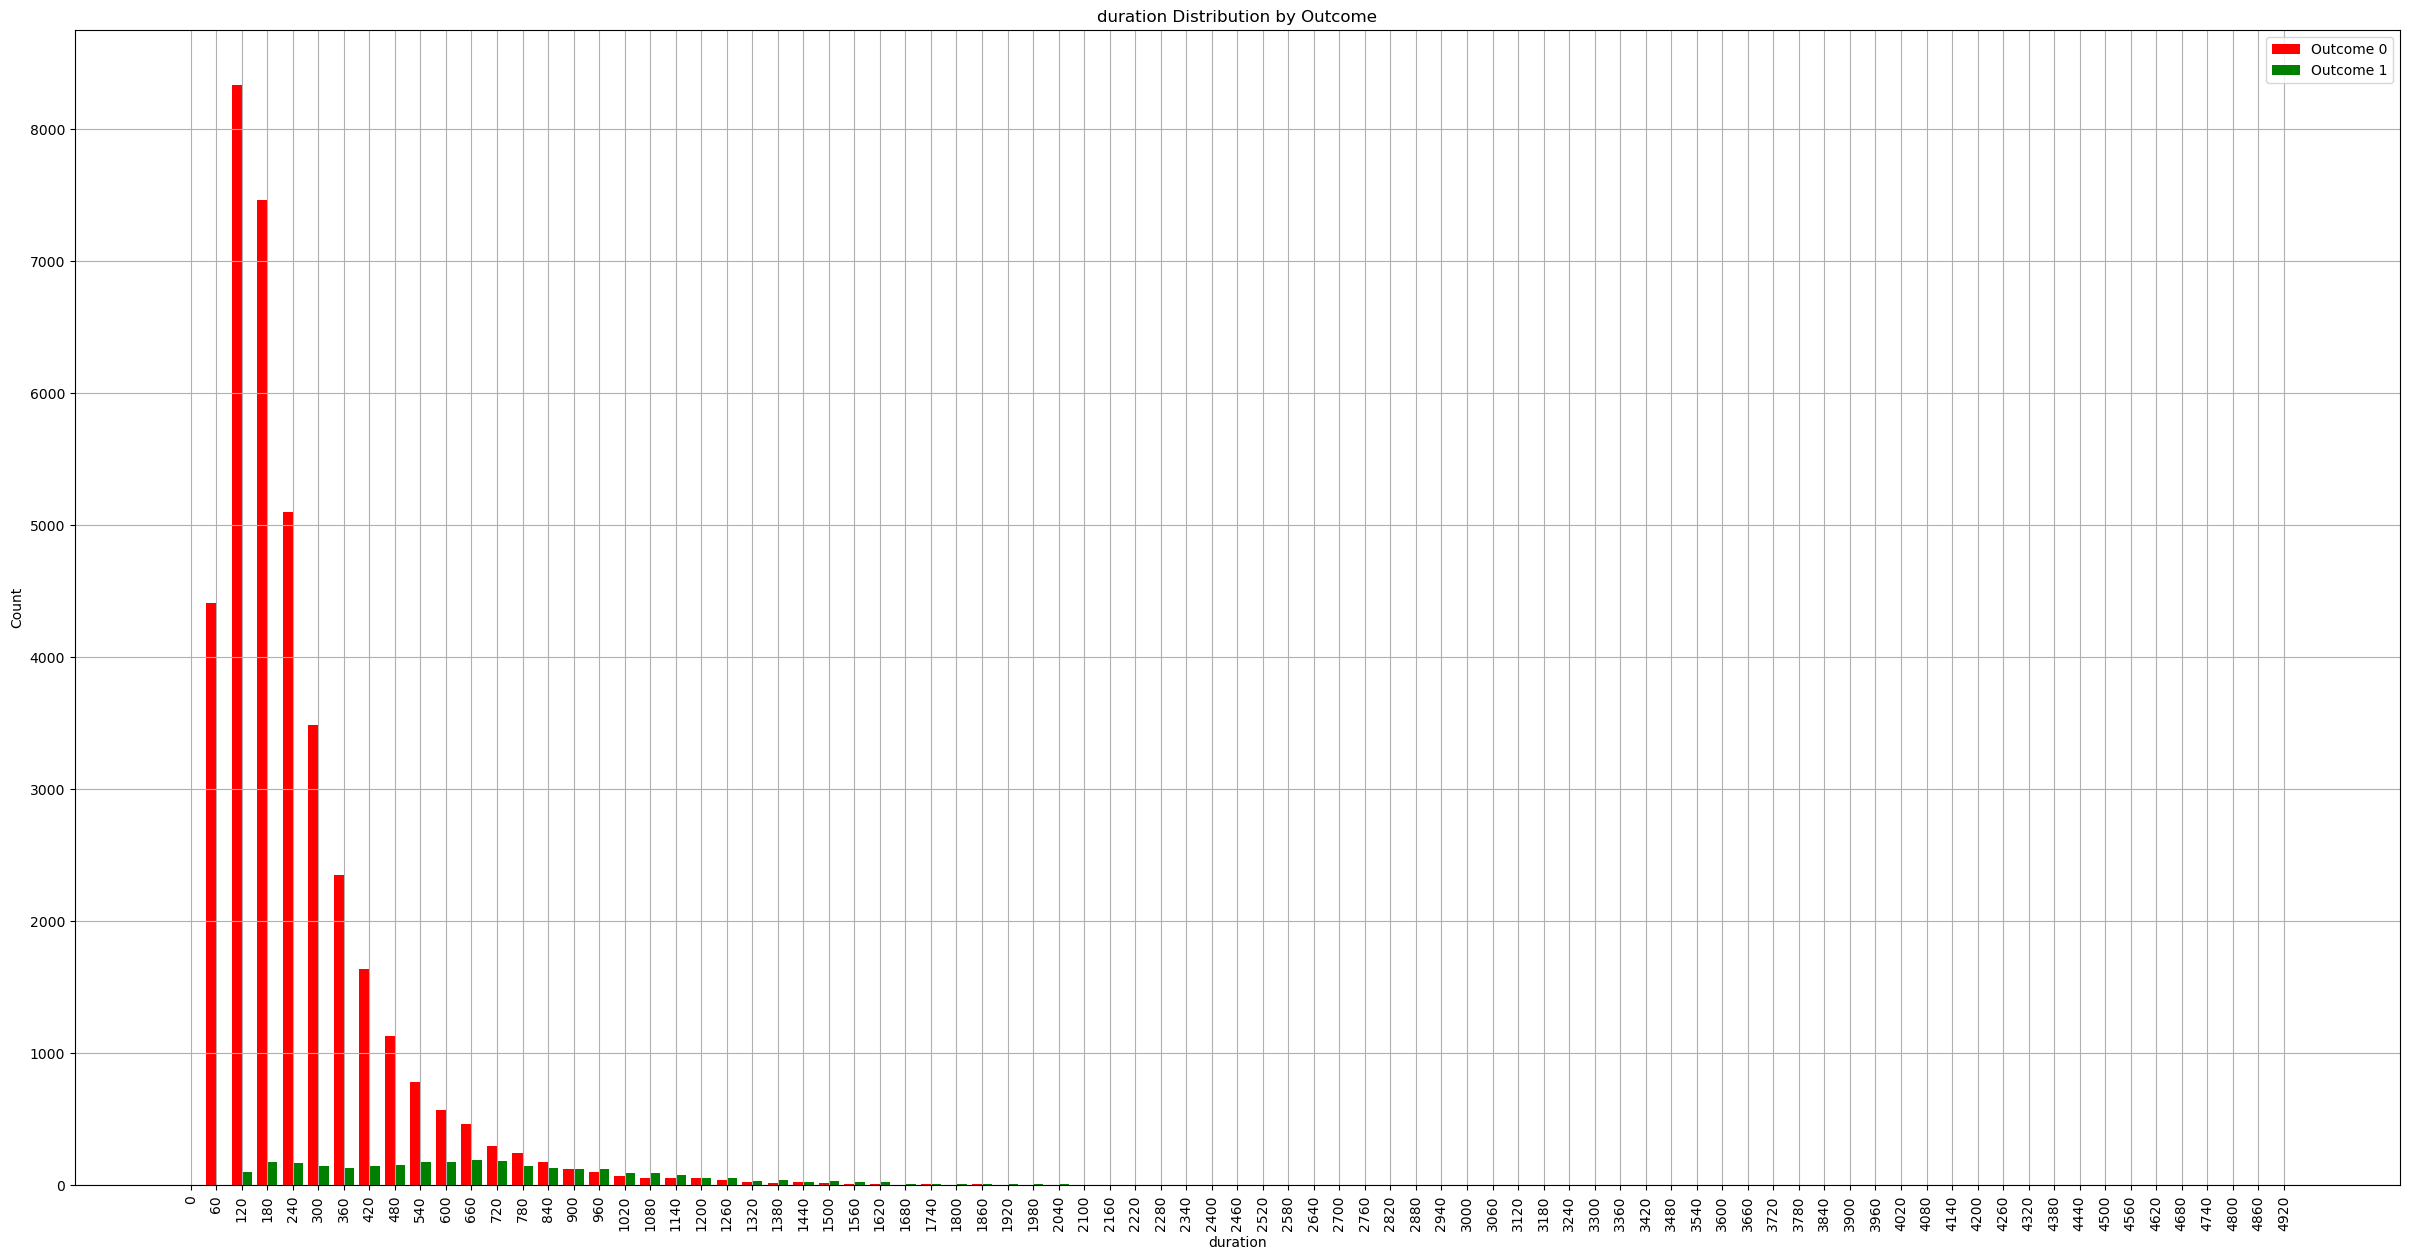

In [14]:
durations = X.iloc[:, 6]
outcomes = y

band = 60

b_o_counts = {}
for i in range(0, max(durations) + 60, band):
    b_o_counts[i] = [0, 0]

duration_keys = list(b_o_counts.keys())

for d, o in zip(durations, outcomes):
    for i, upper_bound in enumerate(duration_keys):
        if d < upper_bound:
            if i > 0:
                if o == 0:
                    b_o_counts[upper_bound][0] += 1
                elif o == 1:
                    b_o_counts[upper_bound][1] += 1
                break

# Extract data for plotting
duration_labels = sorted(list(b_o_counts.keys()))
count_0 = [b_o_counts[duration][0] for duration in duration_labels]
count_1 = [b_o_counts[duration][1] for duration in duration_labels]

# Create a bar chart
plt.figure(figsize=(30, 15))
bar_width = 0.4
index = np.arange(len(duration_labels))

plt.bar(index, count_0, width=bar_width, label='Outcome 0', color='red')
plt.bar(index + bar_width, count_1, width=bar_width, label='Outcome 1', color='green')

plt.xlabel('duration')
plt.ylabel('Count')
plt.title('duration Distribution by Outcome')
plt.xticks(index + bar_width / 2, duration_labels, rotation=90)
plt.legend()
plt.grid(True)
plt.show()